#  Dinamica  Molecular :


La  evolución  clasica de un  sistema de  paticulas  esta  dado  por  las  ecvuaciones  de  Newton 

$$m_{i}\frac{d^2\vec{x}_{i}}{dt^2}=\sum_{j}\vec{F}_{j}$$

La idea  es  determinar  la  evolución dinamica del  sistema,  es  decir  determinar,  la posición, la  velocidad  y  algunos parametros  macorscopicos  como  la  temperatura.  La  temperatura,  esta relacionada  con  la  energia  cinetica  del  sistema  por  medio  de la  teoria  cinetica  de los  gases.  En el  caso  de  un  sistema  bidimensional,  tenemos :

$$ T(t)=\sum_{i=1}^{N}\frac{m_{i}|\vec{v}_{i}(t)|^{2}}{K_{B}N_{f}}$$,

donde $N_{f}$  es el  numero de grados de  libertad  del  sistema.


In [1]:
#  System initialization 
import numpy as np
import matplotlib.pyplot as plt

Kb= 1.3806488e-23
T =1.
mass= Kb

nx, ny = 4, 4
lx, ly = 4, 4
N  = nx*ny
Nf = 2*N-2

# Lennard-Jones potential
# -------------------------------------------------
def energy(r, sigma, epsilon):
    return 4*epsilon*((sigma/r)**12 - (sigma/r)**6)

# Creando la grid.
# -------------------------------------------------
def make_grid():
    x= np.linspace(-lx/2,lx/2,nx)
    y= np.linspace(-ly/2,ly/2,ny)
    X,Y = np.meshgrid(x,y)
    return X,Y

# Velocidad inicial.
# -------------------------------------------------
def init_vel():
    Vx=np.random.uniform(-1.,1., (nx,ny))
    Vy=np.random.uniform(-1.,1., (nx,ny))
    #  Eliminamos  el  movimiento  del  centro  de masa
    Vcmx = np.sum(Vx)/N
    Vcmy = np.sum(Vy)/N
    Vx=Vx-Vcmx
    Vy=Vy-Vcmy
    facnorm =np.sqrt(T*Kb*Nf/(mass*N))
    norm = np.sqrt(Vx**2+Vy**2)
    return facnorm*Vx/norm, facnorm*Vy/norm

# Posicion inicial.
# -------------------------------------------------
def init_coor(x,y,vx,vy,dt):
    return x-vx*dt,y-vy*dt

# Lennard-Jones force
# ------------------------------------------------
def Force(x,y):
    x,y = x.reshape(N),y.reshape(N)
    Fx=np.zeros(np.shape(x)[0])
    Fy=np.zeros(np.shape(x)[0])
    for i  in range(N):
        for j in  range(N):
            rij=np.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)
            if(i!=j):
                Fx[i]+=(48.*rij**-14-24.*rij**-8)*(x[i]-x[j])
                Fy[i]+=(48.*rij**-14-24.*rij**-8)*(y[i]-y[j])
    return Fx.reshape(nx,ny), Fy.reshape(nx,ny)

# Verlet algoritmo
# -------------------------------------------------
def  verlet(xi,yi,x,y,dt):
    Fx,Fy=Force(x,y)
    xf=2*x-xi+Fx*dt**2
    yf=2*y-yi+Fy*dt**2
    
    """
    xf[xf>lx/2]= -lx/2 + (xf[xf > lx/2] - lx/2)
    xf[xf<-lx/2]= lx/2 - (xf[xf <-lx/2] + lx/2)
    yf[yf>ly/2]= -ly/2 + (yf[yf > ly/2] - ly/2)
    yf[yf<-ly/2]= ly/2 - (yf[yf <-ly/2] + ly/2)
    """
    
    return xf,yf

# Corriendo simulacion
# -------------------------------------------------
def run(n,dt):
    x,y=make_grid()
    vx,vy=init_vel()
    xi,yi=init_coor(x,y,vx,vy,dt)
    for i in range(n):
        xf,yf = verlet(xi,yi,x,y,dt)
        vx, vy = (xf-xi)/dt, (yf-yi)/dt    
        xi, yi = x.copy(), y.copy()
        x, y = xf.copy(), yf.copy()
    return xf,yf,vx,vy


# Graficando posiciones y velocidades
def plot_grid(ax,x,y):
    ax.plot(x,y, ".")
    ax.set_title("Posiciones", fontsize=10)
    
def plot_vel(ax,x,y,vx,vy):
    ax.quiver(x,y,vx,vy)
    ax.set_title("Velocidades", fontsize=10)

x,y,vx,vy=run(3,0.01)

fig,(ax1,ax2) = plt.subplots(figsize=(6,2), dpi=100, ncols=2)
plot_grid(ax1,x,y)    
plot_vel(ax2,x,y,vx,vy)
plt.show()  

<Figure size 600x200 with 2 Axes>

Ttest= 1.0


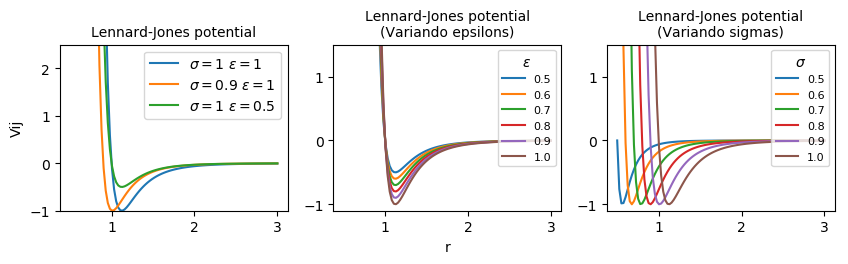

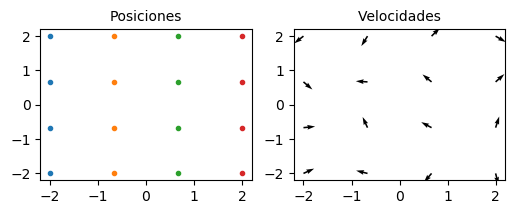

In [2]:
x,y=make_grid()
vx,vy=init_vel()

# -------------------------------------------------
# Temperatura, enegia media
Ttest = mass*np.sum(vx**2+vy**2)/(Kb*Nf)
print("Ttest=",Ttest)

# -------------------------------------------------
# Graficas
# -------------------------------------------------
# Lennard-Jones potential
fig,(ax1,ax2,ax3) = plt.subplots(figsize=(10,2.2), dpi=100, ncols=3)
r = np.linspace(0.5, 3, 100)
ax1.plot(r, energy(r, 1, 1), label=r'$\sigma=1$ $\epsilon=1$')
ax1.plot(r, energy(r, 0.9, 1), label=r'$\sigma=0.9$ $\epsilon=1$')
ax1.plot(r, energy(r, 1, 0.5), label=r'$\sigma=1$ $\epsilon=0.5$')
ax1.set_title("Lennard-Jones potential", fontsize=10)
ax2.set_xlabel("r")
ax1.set_ylabel("Vij")
ax1.set_ylim(-1, 2.5)
ax1.legend()

# Variando epsilons y sigmas
sigma = 1
epsilon = 1
parameter = np.linspace(0.5, 1., 6)
for p in parameter:
    e1 = energy(r, sigma, p)
    ax2.plot(r, e1, label=(str(p)))
    e2 = energy(r, p, epsilon)
    ax3.plot(r, e2, label=(str(p)))
ax2.set_ylim(-1.1, 1.5)
ax3.set_ylim(-1.1, 1.5)
ax2.legend(title=r'$\epsilon$', fontsize=8, loc='upper right')
ax3.legend(title=r'$\sigma$', fontsize=8, loc='upper right')
ax2.set_title('Lennard-Jones potential\n(Variando epsilons)', fontsize=10)
ax3.set_title('Lennard-Jones potential\n(Variando sigmas)', fontsize=10)
plt.show()

# Graficando posiciones y velocidades
def plot_grid(ax,x,y):
    ax.plot(x,y, ".")
    ax.set_title("Posiciones", fontsize=10)
    
def plot_vel(ax,x,y,vx,vy):
    ax.quiver(x,y,vx,vy)
    ax.set_title("Velocidades", fontsize=10)

fig,(ax1,ax2) = plt.subplots(figsize=(6,2), dpi=100, ncols=2)
plot_grid(ax1,x,y)    
plot_vel(ax2,x,y,vx,vy)
plt.show()

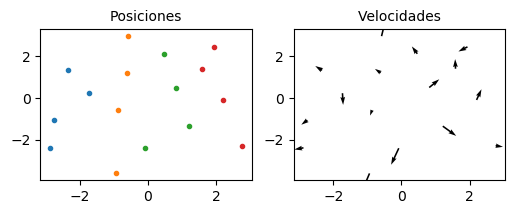

In [3]:
x,y,vx,vy=run(1000,0.001)
fig,(ax1,ax2) = plt.subplots(figsize=(6,2), dpi=100, ncols=2)
plot_grid(ax1,x,y)    
plot_vel(ax2,x,y,vx,vy)
plt.show()